# Julia Examples

## Benchmarking

We calculate the floating point operations per second from the elapsed time of multiplying two matrices __A__ and __B__.

In [1]:
n = Int(8192/2);
aa = rand(Float32,n,n);
bb = rand(Float32,n,n);

In [2]:
etime = @elapsed aa*bb

2.642028096

In [3]:
GFlops = 2*n^3/(etime*1e+9)

52.02024674910952

In [4]:
?@elapsed

```
@elapsed
```

A macro to evaluate an expression, discarding the resulting value, instead returning the number of seconds it took to execute as a floating-point number.

See also [`@time`](@ref), [`@timev`](@ref), [`@timed`](@ref), and [`@allocated`](@ref).

```julia-repl
julia> @elapsed sleep(0.3)
0.301391426
```


## Plotting

In [5]:
n = 200;
t = 0:50/n:50;
y = [ sin(ti) for ti in t ];

In [6]:
#import Pkg
#Pkg.add("FFTW")
using FFTW

In [7]:
Y = fft(y)
Y = [ abs(Y[i])*2/n for i in 1:Int(n/2)+1 ]
f = 0:1/t[n+1]:Int(1/t[2]/2)

0.0:0.02:2.0

In [8]:
#import Pkg
#Pkg.add("PyPlot")
using PyPlot
# consider...
using LaTeXStrings
using Printf

In [9]:
display(L"\mu:")
display(latexstring("ez\\,is\\;"*"\\mu"))
LaTeXString( "de ez szebb: \$\\mu\$ értéke \$"*@sprintf("%.3g",1/3)*"\$" )

L"$\mu:$"

L"$ez\,is\;\mu$"

L"de ez szebb: $\mu$ értéke $0.333$"

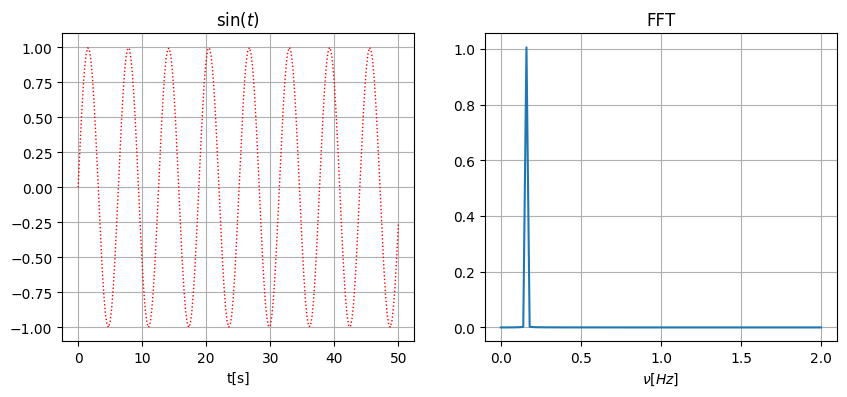

PyObject Text(0.5, 26.28125, '$\\nu[Hz]$')

In [10]:
figure(1,figsize=(10,4))
subplot(121)
plot(t,y,linestyle=":",c="red",lw=1)
title(L"\sin(t)")
grid()
xlabel("t[s]")

subplot(122)
plot(f,Y)
title("FFT")
grid()
xlabel(L"\nu[Hz]")

# Numerical simulation

In [11]:
using PyCall
spi = pyimport("scipy.integrate")

PyObject <module 'scipy.integrate' from '/usr/local/lib/python3.7/dist-packages/scipy/integrate/__init__.py'>

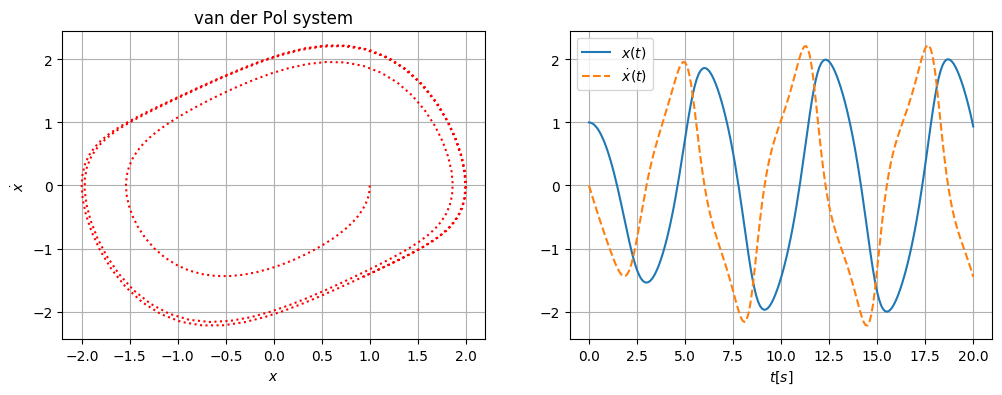

In [12]:
function ode(z,t)
    x,y = z[1],z[2]
    dz = [ y;
            -x - mu*(x^2-1)*y ]
end

mu= .5
# use range instead of linspace, or 0:.1:20
t = range(0,20;length=201)
ic = [1,0]
xy = spi.odeint(ode,ic,t)

figure(1,figsize=[12,4])

# 1x2:1
subplot(121)
plot(xy[:,1],xy[:,2],color=:red,ls=:dotted)
xlabel(L"x")
ylabel(L"\dot x")
title("van der Pol system")
grid()

# 1x2:2
subplot(122)
plot(t,xy[:,1],label=L"x(t)")
plot(t,xy[:,2],label=L"\dot x(t)",ls=:dashed)
xlabel(L"t[s]")
legend()
grid()

Now, add some streamplots, null-clines, etc.

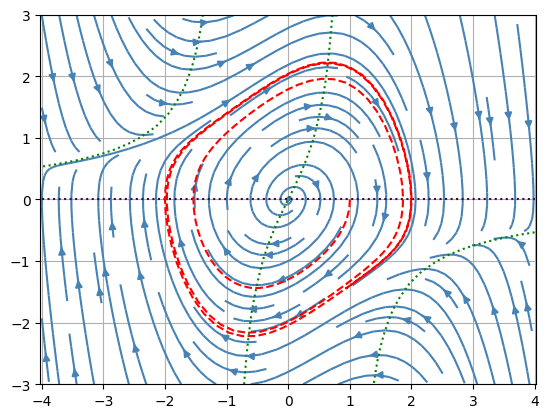

In [13]:
# create a meshgrid fun:
function meshgrid(xr,yr)
    nj = length(xr)
    ni = length(yr)
    xx = [ xr[j] for i in 1:ni, j in 1:nj ]
    yy = [ yr[i] for i in 1:ni, j in 1:nj ]
    return xx,yy
end
xx,yy = meshgrid(-4:.2:4,-3:.2:3)
fxy = yy
gxy = -xx - mu*(xx.^2-ones(size(xx))).*yy
streamplot( xx,yy, fxy, gxy, color=:steelblue )
contour( xx,yy, fxy, levels=[0], linestyles=:dotted )
contour( xx,yy, gxy, levels=[0], colors=:g, linestyles=:dotted )
#contour( xx,yy,Hxy_mx, levels=[0], colors="orange" )
axis("equal")
plot(xy[:,1],xy[:,2],color=:red,ls=:dashed)
grid()

# Animation

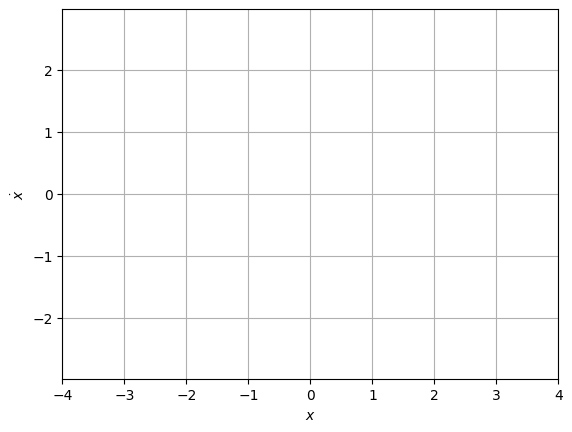

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff0d111f780>

In [14]:
#
# init for animation
#
#using PyCall
mplanim = pyimport("matplotlib.animation")

fig,ax = subplots()
function ax_init(ax)
    # clearing the current axis
    ax.cla()
    ax.axis("equal")
    ax.set_xlim(-4,4)
    ax.set_ylim(-3,3)
    ax.set_xlabel(L"x")
    ax.set_ylabel(L"\dot x")
    ax.grid()
    axpt, = ax.plot([],[])
end
ax_init(ax)

In [15]:
# the values of mu...
mui= -1:.1:1

function animate(fr)
global mu
    ax_init(ax)
    t = range(0,20;length=201)
    mu = mui[fr+1]
    ic = [mu*.9-1,0]
    xy = spi.odeint(ode,ic,t)
    gxy = -xx - mu*(xx.^2-ones(size(xx))).*yy
    ax.streamplot( xx,yy, fxy, gxy, color=:steelblue )
    ax.contour( xx,yy, fxy, levels=[0], linestyles=:dotted )
    ax.contour( xx,yy, gxy, levels=[0], colors=:g, linestyles=:dotted )
#contour( xx,yy,Hxy_mx, levels=[0], colors="orange" )
    ax.plot(xy[:,1],xy[:,2],c=:r,ls=:dashed)
    ax.set_title( latexstring("\\ddot x "*@sprintf("%+.2g",mu)*"(x^2-1)\\dot x + x") )
end
movie = mplanim.FuncAnimation(fig, animate, frames=21, interval=500)
#HTML(movie.to_html5_video()) # needs ffmpeg!
HTML(movie.to_jshtml())

HTML{String}("\n<link rel=\"stylesheet\"\nhref=\"https://maxcdn.bootstrapcdn.com/font-awesome/4.4.0/\ncss/font-awesome.min.css\">\n<script language=\"javascript\">\n  function isInternetExplorer() {\n    ua = navigator.userAgent;\n    /* MSIE used to detect old browsers and Trident used to newer ones*/\n    return ua.indexOf(\"MSIE \") > -1 || ua.indexOf(\"Trident/\") > -1;\n  }\n\n  /* Define the Animation class */\n  function Animation(frames, img_id, slider_id, interval, loop_select_id){\n    this.img_id = img_id;\n    this.slider_id = slider_id;\n    this.loop_select_id = loop_select_id;\n    this.interval = interval;\n    this.current_frame = 0;\n    this.direction = 0;\n    this.timer = null;\n    this.frames = new Array(frames.length);\n\n    for (var i=0; i<frames.length; i++)\n    {\n     this.frames[i] = new Image();\n     this.frames[i].src = frames[i];\n    }\n    var slider = document.getElementById(this.slider_id);\n    slider.max = this.frames.length - 1;\n    if (isInternetExplorer()) {\n        // switch from oninput to onchange because IE <= 11 does not conform\n        // with W3C specification. It ignores oninput and onchange behaves\n        // like oninput. In contrast, Mircosoft Edge behaves correctly.\n        slider.setAttribute('onchange', slider.getAttribute('oninput'));\n        slider.setAttribute('oninput', null);\n    }\n    this.set_frame(this.current_frame);\n  }\n\n  Animation.prototype.get_loop_state = function(){\n    var button_group = document[this.loop_select_id].state;\n    for (var i = 0; i < button_group.length; i++) {\n        var button = button_group[i];\n        if (button.checked) {\n            return button.value;\n        }\n    }\n    return undefined;\n  }\n\n  Animation.prototype.set_frame = function(frame){\n    this.current_frame = frame;\n    document.getElementById(this.img_id).src =\n            this.frames[this.current_frame].src;\n    document.getElementById(this.slider_id).value = this.current_frame;\n  }\n\n  Animation.prototype.next_frame = function()\n  {\n    this.set_frame(Math.min(this.frames.length - 1, this.current_frame + 1));\n  }\n\n  Animation.prototype.previous_frame = function()\n  {\n    this.set_frame(Math.max(0, this.current_frame - 1));\n  }\n\n  Animation.prototype.first_frame = function()\n  {\n    this.set_frame(0);\n  }\n\n  Animation.prototype.last_frame = function()\n  {\n    this.set_frame(this.frames.length - 1);\n  }\n\n  Animation.prototype.slower = function()\n  {\n    this.interval /= 0.7;\n    if(this.direction > 0){this.play_animation();}\n    else if(this.direction < 0){this.reverse_animation();}\n  }\n\n  Animation.prototype.faster = function()\n  {\n    this.interval *= 0.7;\n    if(this.direction > 0){this.play_animation();}\n    else if(this.direction < 0){this.reverse_animation();}\n  }\n\n  Animation.prototype.anim_step_forward = function()\n  {\n    this.current_frame += 1;\n    if(this.current_frame < this.frames.length){\n      this.set_frame(this.current_frame);\n    }else{\n      var loop_state = this.get_loop_state();\n      if(loop_state == \"loop\"){\n        this.first_frame();\n      }else if(loop_state == \"reflect\"){\n        this.last_frame();\n        this.reverse_animation();\n      }else{\n        this.pause_animation();\n        this.last_frame();\n      }\n    }\n  }\n\n  Animation.prototype.anim_step_reverse = function()\n  {\n    this.current_frame -= 1;\n    if(this.current_frame >= 0){\n      this.set_frame(this.current_frame);\n    }else{\n      var loop_state = this.get_loop_state();\n      if(loop_state == \"loop\"){\n        this.last_frame();\n      }else if(loop_state == \"reflect\"){\n        this.first_frame();\n        this.play_animation();\n      }else{\n        this.pause_animation();\n        this.first_frame();\n      }\n    }\n  }\n\n  Animation.prototype.pause_animation = function()\n  {\n    this.direction = 0;\n    if (this.timer){\n      clearInterval(this.timer);\n      this.timer = nul